In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample = cv2.imread('sample.jpg', 0)
print(sample.shape)

(106, 884)


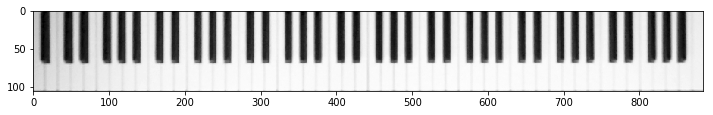

In [3]:
plt.figure(figsize=(12, 24))
plt.imshow(sample, 'gray')

In [4]:
blur = cv2.GaussianBlur(sample, (5, 5), 0)
_, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)

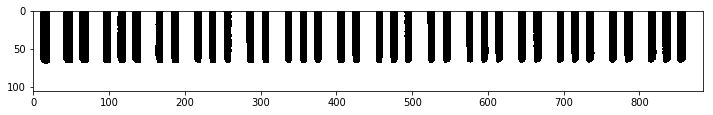

In [5]:
plt.figure(figsize=(12, 24))
plt.imshow(bw, 'gray')

In [6]:
upper = np.mean(bw[0:5], axis=0)

In [7]:
black_keys = []

last = -1

for i, x in enumerate(upper):
    if x <= 255 / 5:
        if last == -1:
            last = i
    else:
        if last != -1:
            black_keys.append((last, i - 1))
            last = -1
            
print(len(black_keys)) # should be 36

36


In [8]:
expected_width = 20

for i, (x, y) in enumerate(black_keys):
    offset = (expected_width - (y - x + 1)) // 2
    black_keys[i] = (x - offset, y + offset)

In [9]:
black_keys = np.array(black_keys)

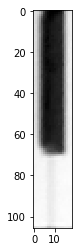

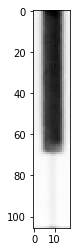

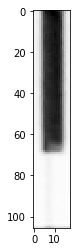

In [10]:
ind = [2, 24, 27]
for index in ind:
    plt.imshow(sample[:, black_keys[index][0]: black_keys[index][1]], 'gray')
    plt.show()

In [17]:
def get_black_keys(img, expected_width=20):
    '''
    want a grayscale image, (h, w) format
    '''
    blur = cv2.GaussianBlur(img, (5, 5), 0)
    _, bw = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)
    upper = np.mean(bw[0:5], axis=0)
    
    black_keys = []

    last = -1

    for i, x in enumerate(upper):
        if x <= 255 / 5:
            if last == -1:
                last = i
        else:
            if last != -1:
                black_keys.append([last, i - 1])
                last = -1

    for i, coor in enumerate(black_keys):
        x, y = coor
        offset = (expected_width - (y - x)) // 2
        if y - x + offset * 2 == expected_width:
            coor[0] = x - offset
            coor[1] = y + offset
        else: # prevent //2 rounding from decreasing the size by 1
            if i < 18:
                coor[0] = x - offset - 1
                coor[1] = y + offset
            else:
                coor[0] = x - offset
                coor[1] = y + offset + 1
    
    return black_keys

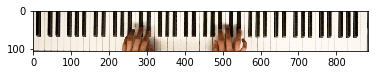

In [18]:
img = cv2.imread("../../keyboard_4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imggr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

In [19]:
r = get_black_keys(imggr, 16)
for iii in r:
    print(iii[1] - iii[0])

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16


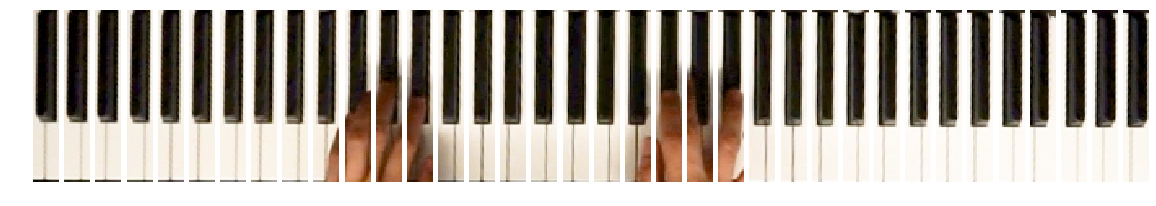

In [20]:
fig, ax = plt.subplots(1, len(r), figsize=(20, 30))
for i, (left, right) in enumerate(r):
    ax[i].axis('off')
    ax[i].imshow(img[:,left:right])

In [15]:
type(r)

list